In [8]:
# A cell to run functions directly.
using Reexport
using Distributions
using Statistics
using Meshes
using Distances
using Random
using GeoTables
using DataFrames
import CairoMakie as Mke
using Infiltrator
using AbstractGPs
using ProgressMeter
using Unitful
using JLD2
using Plots
using DataStructures
using POMDPModelTools
using POMDPs
using ParticleFilters
using LinearAlgebra
include("../src/config.jl");
include("../src/pomdp.jl")
pomdp = CCSPOMDP();

FEATURE = :z


:z

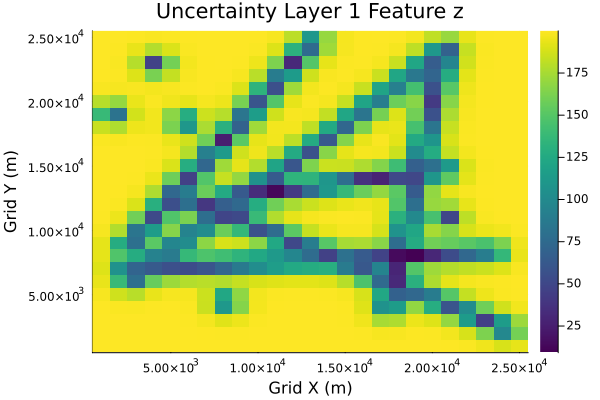

In [9]:
# Visualizing a true POMDP run
"""
Action: @NamedTuple{id::Symbol, geometry::Meshes.Geometry}((:well_action, Point(x: 3137.0 m, y: 21878.0 m))), Reward: 6234.787708023031
Action: @NamedTuple{id::Symbol, geometry::Meshes.Geometry}((:seismic_action, Segment((x: 1677.0 m, y: 5184.0 m), (x: 19188.0 m, y: 22358.0 m)))), Reward: 174.19000998225386
Action: @NamedTuple{id::Symbol, geometry::Meshes.Geometry}((:seismic_action, Segment((x: 5093.0 m, y: 11347.0 m), (x: 23179.0 m, y: 1382.0 m)))), Reward: 131.24305094855282
Action: @NamedTuple{id::Symbol, geometry::Meshes.Geometry}((:seismic_action, Segment((x: 12092.0 m, y: 23502.0 m), (x: 1560.0 m, y: 7783.0 m)))), Reward: 123.85075383495035
Action: @NamedTuple{id::Symbol, geometry::Meshes.Geometry}((:seismic_action, Segment((x: 16467.0 m, y: 3005.0 m), (x: 19692.0 m, y: 22983.0 m)))), Reward: 112.78774725650584
Action: @NamedTuple{id::Symbol, geometry::Meshes.Geometry}((:seismic_action, Segment((x: 22393.0 m, y: 7309.0 m), (x: 1493.0 m, y: 5928.0 m)))), Reward: 83.68955905944142
Action: @NamedTuple{id::Symbol, geometry::Meshes.Geometry}((:seismic_action, Segment((x: 19524.0 m, y: 13678.0 m), (x: 7438.0 m, y: 11498.0 m)))), Reward: 17.622370183587464
Action: @NamedTuple{id::Symbol, geometry::Meshes.Geometry}((:well_action, Point(x: 19810.0 m, y: 9955.0 m))), Reward: 7.08837614705439
Action: @NamedTuple{id::Symbol, geometry::Meshes.Geometry}((:well_action, Point(x: 668.0 m, y: 18062.0 m))), Reward: 4.7452470573681325
Action: @NamedTuple{id::Symbol, geometry::Meshes.Geometry}((:well_action, Point(x: 7185.0 m, y: 3458.0 m))), Reward: 4.617582537296286
Action: @NamedTuple{id::Symbol, geometry::Meshes.Geometry}((:well_action, Point(x: 4782.0 m, y: 17442.0 m))), Reward: 4.478505168215477
Action: @NamedTuple{id::Symbol, geometry::Meshes.Geometry}((:well_action, Point(x: 10148.0 m, y: 19241.0 m))), Reward: 0.5418924887532626
Action: @NamedTuple{id::Symbol, geometry::Meshes.Geometry}((:terminate_action, Point(x: 0.0 m, y: 0.0 m))), Reward: 0.0
"""

actions = [
    @NamedTuple{id::Symbol, geometry::Meshes.Geometry}((:well_action, Point(3137.0, 21878.0))), 
    @NamedTuple{id::Symbol, geometry::Meshes.Geometry}((:seismic_action, Segment((1677.0, 5184.0), (19188.0, 22358.0)))),
    @NamedTuple{id::Symbol, geometry::Meshes.Geometry}((:seismic_action, Segment((5093.0, 11347.0), (23179.0, 1382.0)))), 
    @NamedTuple{id::Symbol, geometry::Meshes.Geometry}((:seismic_action, Segment((12092.0, 23502.0), (1560.0, 7783.0)))), 
    @NamedTuple{id::Symbol, geometry::Meshes.Geometry}((:seismic_action, Segment((16467.0, 3005.0), (19692.0, 22983.0)))),
    @NamedTuple{id::Symbol, geometry::Meshes.Geometry}((:seismic_action, Segment((22393.0, 7309.0), (1493.0, 5928.0)))), 
    @NamedTuple{id::Symbol, geometry::Meshes.Geometry}((:seismic_action, Segment((19524.0, 13678.0), (7438.0, 11498.0)))), 
    @NamedTuple{id::Symbol, geometry::Meshes.Geometry}((:well_action, Point(19810.0, 9955.0))), 
    @NamedTuple{id::Symbol, geometry::Meshes.Geometry}((:well_action, Point(668.0, 18062.0))), 
    @NamedTuple{id::Symbol, geometry::Meshes.Geometry}((:well_action, Point(7185.0, 3458.0))), 
    @NamedTuple{id::Symbol, geometry::Meshes.Geometry}((:well_action, Point(4782.0, 17442.0))), 

]

curstate = rand(initialstate(pomdp))
for action in actions
    step = POMDPs.gen(pomdp, curstate, action, nothing)
    # println(typeof(step), "\nReward: ", step.r)
    curstate = step.sp
end

visualize_uncertainty(curstate, 1, FEATURE)

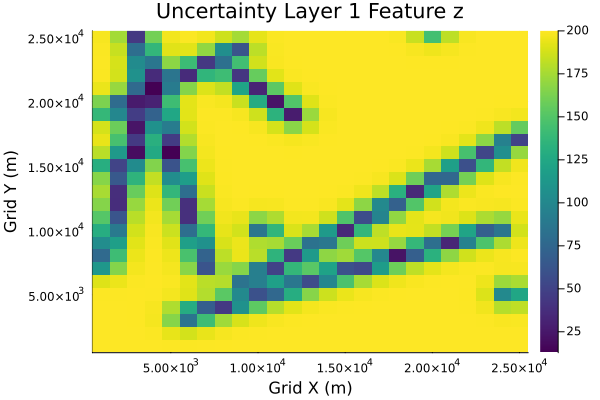

In [10]:
# Sample expert policy run
"""
Chosen Action: @NamedTuple{id::Symbol, geometry::Geometry}((:well_action, Point(x: 658.0 m, y: 13868.0 m)))
Chosen Action: @NamedTuple{id::Symbol, geometry::Geometry}((:seismic_action, Segment((x: 8378.0 m, y: 5056.0 m), (x: 23886.0 m, y: 16158.0 m))))
Chosen Action: @NamedTuple{id::Symbol, geometry::Geometry}((:seismic_action, Segment((x: 7935.0 m, y: 20841.0 m), (x: 10852.0 m, y: 18077.0 m))))
Chosen Action: @NamedTuple{id::Symbol, geometry::Geometry}((:well_action, Point(x: 19044.0 m, y: 24718.0 m)))
Chosen Action: @NamedTuple{id::Symbol, geometry::Geometry}((:well_action, Point(x: 9348.0 m, y: 9098.0 m)))
Chosen Action: @NamedTuple{id::Symbol, geometry::Geometry}((:well_action, Point(x: 2135.0 m, y: 15014.0 m)))
Chosen Action: @NamedTuple{id::Symbol, geometry::Geometry}((:well_action, Point(x: 658.0 m, y: 13868.0 m)))
Chosen Action: @NamedTuple{id::Symbol, geometry::Geometry}((:seismic_action, Segment((x: 1922.0 m, y: 24787.0 m), (x: 5921.0 m, y: 6260.0 m))))
Chosen Action: @NamedTuple{id::Symbol, geometry::Geometry}((:seismic_action, Segment((x: 2762.0 m, y: 21640.0 m), (x: 203.0 m, y: 6512.0 m))))
Chosen Action: @NamedTuple{id::Symbol, geometry::Geometry}((:seismic_action, Segment((x: 4928.0 m, y: 2346.0 m), (x: 22619.0 m, y: 9043.0 m))))
Chosen Action: @NamedTuple{id::Symbol, geometry::Geometry}((:well_action, Point(x: 23434.0 m, y: 4064.0 m)))
Chosen Action: @NamedTuple{id::Symbol, geometry::Geometry}((:seismic_action, Segment((x: 703.0 m, y: 18394.0 m), (x: 7688.0 m, y: 22886.0 m))))"""

actions = [
    @NamedTuple{id::Symbol, geometry::Geometry}((:well_action, Point(658.0, 13868.0)))
    @NamedTuple{id::Symbol, geometry::Geometry}((:seismic_action, Segment((8378.0 , 5056.0), (23886.0,16158.0))))
    @NamedTuple{id::Symbol, geometry::Geometry}((:seismic_action, Segment((7935.0 , 20841.0), (10852.0,18077.0))))
    @NamedTuple{id::Symbol, geometry::Geometry}((:well_action, Point(19044.0, 24718.0)))
    @NamedTuple{id::Symbol, geometry::Geometry}((:well_action, Point(9348.0, 9098.0)))
    @NamedTuple{id::Symbol, geometry::Geometry}((:well_action, Point(2135.0, 15014.0)))
    @NamedTuple{id::Symbol, geometry::Geometry}((:well_action, Point(658.0, 13868.0)))
    @NamedTuple{id::Symbol, geometry::Geometry}((:seismic_action, Segment((1922.0 , 24787.0), (5921.0,6260.0))))
    @NamedTuple{id::Symbol, geometry::Geometry}((:seismic_action, Segment((2762.0 , 21640.0), (203.0,6512.0))))
    @NamedTuple{id::Symbol, geometry::Geometry}((:seismic_action, Segment((4928.0 , 2346.0), (22619.0,9043.0))))
    @NamedTuple{id::Symbol, geometry::Geometry}((:well_action, Point(23434.0, 4064.0)))
    @NamedTuple{id::Symbol, geometry::Geometry}((:seismic_action, Segment((703.0 , 18394.0), (7688.0,22886.0))))
]

curstate = rand(initialstate(pomdp))
for action in actions
    step = POMDPs.gen(pomdp, curstate, action, nothing)
    # println(typeof(step), "\nReward: ", step.r)
    curstate = step.sp
end

visualize_uncertainty(curstate, 1, FEATURE)

In [50]:
visualize_gt(pomdp, 1)

### Test: Action function returns all actions

In [51]:
all_actions = POMDPs.actions(pomdp);

### Test: Observation function returns correct distributions

w/o scaling, For column permeability, with scaling factor: 1.5, mean uncertainty after scaling: 2.2908923270902517
w/o scaling, For column topSealThickness, with scaling factor: 15.0, mean uncertainty after scaling: 1.0
w/o scaling, For column z, with scaling factor: 150.0, mean uncertainty after scaling: 1.3333333333333326
w/o scaling, For column bottomSeal, with scaling factor: 1.0, mean uncertainty after scaling: 1.0
w/o scaling, For column injectivity, with scaling factor: 0.6324555320336759, mean uncertainty after scaling: 1.2472191289246453
w/o scaling, For column salinity, with scaling factor: 23.979157616563597, mean uncertainty after scaling: 1.377879067493836
Total Layer Col uncertainty: 8.249323856842066
-----------------------------------
w/o scaling, For column permeability, with scaling factor: 1.5, mean uncertainty after scaling: 2.2908923270902517
w/o scaling, For column topSealThickness, with scaling factor: 15.0, mean uncertainty after scaling: 0.9900271373009276
w/o 

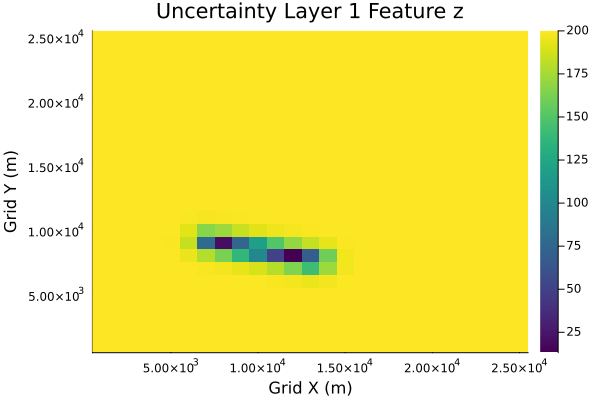

In [52]:
# Taking a seismic line action first
curstate = rand(initialstate(pomdp))
step = POMDPs.gen(pomdp, curstate, all_actions[21], nothing)
println(typeof(step), "\nReward: ", step.r)
curstate = step.sp

println(curstate.rocktype_belief)
visualize_uncertainty(curstate, 1, FEATURE)

w/o scaling, For column permeability, with scaling factor: 1.5, mean uncertainty after scaling: 2.2908923270902517
w/o scaling, For column topSealThickness, with scaling factor: 15.0, mean uncertainty after scaling: 1.0
w/o scaling, For column z, with scaling factor: 150.0, mean uncertainty after scaling: 1.3333333333333326
w/o scaling, For column bottomSeal, with scaling factor: 1.0, mean uncertainty after scaling: 1.0
w/o scaling, For column injectivity, with scaling factor: 0.6324555320336759, mean uncertainty after scaling: 1.2472191289246453
w/o scaling, For column salinity, with scaling factor: 23.979157616563597, mean uncertainty after scaling: 1.377879067493836
Total Layer Col uncertainty: 8.249323856842066
-----------------------------------
w/o scaling, For column permeability, with scaling factor: 1.5, mean uncertainty after scaling: 0.9974272046766808
w/o scaling, For column topSealThickness, with scaling factor: 15.0, mean uncertainty after scaling: 0.9974882830116909
w/o 

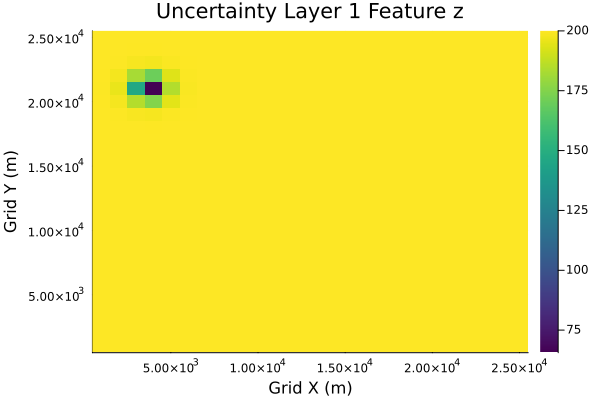

In [53]:
curstate = rand(initialstate(pomdp))
step = POMDPs.gen(pomdp, curstate, all_actions[2], nothing)
println(typeof(step), "\nReward: ", step.r)
curstate = step.sp

println(curstate.rocktype_belief)
visualize_uncertainty(curstate, 1, FEATURE)

w/o scaling, For column permeability, with scaling factor: 1.5, mean uncertainty after scaling: 0.9974272046766808
w/o scaling, For column topSealThickness, with scaling factor: 15.0, mean uncertainty after scaling: 0.9974882830116909
w/o scaling, For column z, with scaling factor: 150.0, mean uncertainty after scaling: 1.3298984445898945
w/o scaling, For column bottomSeal, with scaling factor: 1.0, mean uncertainty after scaling: 1.0
w/o scaling, For column injectivity, with scaling factor: 0.6324555320336759, mean uncertainty after scaling: 0.49875674324879
w/o scaling, For column salinity, with scaling factor: 23.979157616563597, mean uncertainty after scaling: 1.4558394712902454
Total Layer Col uncertainty: 6.279410146817301
-----------------------------------
w/o scaling, For column permeability, with scaling factor: 1.5, mean uncertainty after scaling: 0.9950196518541393
w/o scaling, For column topSealThickness, with scaling factor: 15.0, mean uncertainty after scaling: 0.9951285

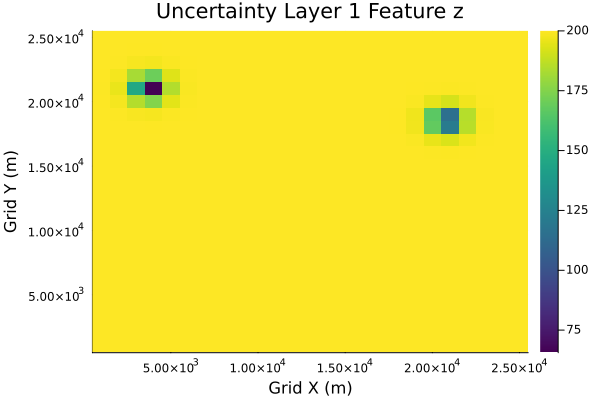

In [54]:
step = POMDPs.gen(pomdp, curstate, all_actions[7], nothing)
println(typeof(step), "\nReward: ", step.r)
curstate = step.sp

println(curstate.rocktype_belief)
visualize_uncertainty(curstate, 1, FEATURE)